In [1]:
library(tidyverse)
library(caret)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [2]:
titanicData <-read_csv("titanic.csv")
titanicData <-filter(titanicData,!is.na(survived)& !is.na(fare)& !is.na(age))
titanicData$survived <-as.factor(titanicData$survived)

set.seed(1)
training <-sample(1:nrow(titanicData), size =nrow(titanicData)*0.8)
testing <- dplyr::setdiff(1:nrow(titanicData), training)
titanicDataTrain <- titanicData[training, ]
titanicDataTest <- titanicData[testing, ]


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  pclass = col_double(),
  survived = col_double(),
  name = col_character(),
  sex = col_character(),
  age = col_double(),
  sibsp = col_double(),
  parch = col_double(),
  ticket = col_character(),
  fare = col_double(),
  cabin = col_character(),
  embarked = col_character(),
  boat = col_character(),
  body = col_double(),
  home.dest = col_character()
)




In [51]:
print(titanicDataTrain)
summary(titanicDataTrain)

# A tibble: 836 x 14
   pclass survived name      sex     age sibsp parch ticket  fare cabin embarked
    <dbl> <fct>    <chr>     <chr> <dbl> <dbl> <dbl> <chr>  <dbl> <chr> <chr>   
 1      3 0        Vande Wa… male     28     0     0 345770  9.5  NA    S       
 2      3 0        Cribb, M… male     44     0     1 371362 16.1  NA    S       
 3      1 1        Harder, … fema…    25     1     0 11765  55.4  E50   C       
 4      3 1        Persson,… male     25     1     0 347083  7.78 NA    S       
 5      2 0        Norman, … male     28     0     0 218629 13.5  NA    S       
 6      2 1        Beane, M… fema…    19     1     0 2908   26    NA    S       
 7      1 0        White, M… male     54     0     1 35281  77.3  D26   S       
 8      3 0        Attalah,… male     30     0     0 2694    7.22 NA    C       
 9      2 0        Chapman,… fema…    29     1     0 SC/AH… 26    NA    S       
10      1 0        Brady, M… male     41     0     0 113054 30.5  A21   S       
# … wit

     pclass      survived     name               sex           
 Min.   :1.000   0:490    Length:836         Length:836        
 1st Qu.:1.000   1:346    Class :character   Class :character  
 Median :2.000            Mode  :character   Mode  :character  
 Mean   :2.233                                                 
 3rd Qu.:3.000                                                 
 Max.   :3.000                                                 
                                                               
      age              sibsp            parch           ticket         
 Min.   : 0.1667   Min.   :0.0000   Min.   :0.0000   Length:836        
 1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :28.0000   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :29.3458   Mean   :0.5144   Mean   :0.4246                     
 3rd Qu.:37.0000   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :80.0000   Max.   :8.0000   Max.   :6.0000      

In [42]:
trctrl <- trainControl(method = "repeatedcv", 
                       number = 10, 
                       repeats = 3)

set.seed(1980)

knn_fit <- train(survived ~ ., 
                 data = select(titanicDataTrain, survived, age, fare, sex), 
                 method = "knn", 
                 trControl = trctrl, 
                 preProcess = c("center", "scale"), 
                 tuneGrid = data.frame(k = 2:30))

k-Nearest Neighbors 

836 samples
  3 predictor
  2 classes: '0', '1' 

Pre-processing: centered (3), scaled (3) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 752, 753, 752, 752, 753, 753, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.7116992  0.4042096
   3  0.7548049  0.4916940
   4  0.7480589  0.4781143
   5  0.7683448  0.5193861
   6  0.7611541  0.5023262
   7  0.7639319  0.5077691
   8  0.7563540  0.4915691
   9  0.7635494  0.5061776
  10  0.7595907  0.4989886
  11  0.7571572  0.4944102
  12  0.7599876  0.5005249
  13  0.7659830  0.5143491
  14  0.7663607  0.5158522
  15  0.7687655  0.5218033
  16  0.7675512  0.5190433
  17  0.7639702  0.5118637
  18  0.7675655  0.5189344
  19  0.7675559  0.5180566
  20  0.7671687  0.5170412
  21  0.7691337  0.5207949
  22  0.7699082  0.5222042
  23  0.7695209  0.5214449
  24  0.7707210  0.5239233
  25  0.7715098  0.5246378
  26  0.7711082  0.5243087
  27  0.7691193  0.51

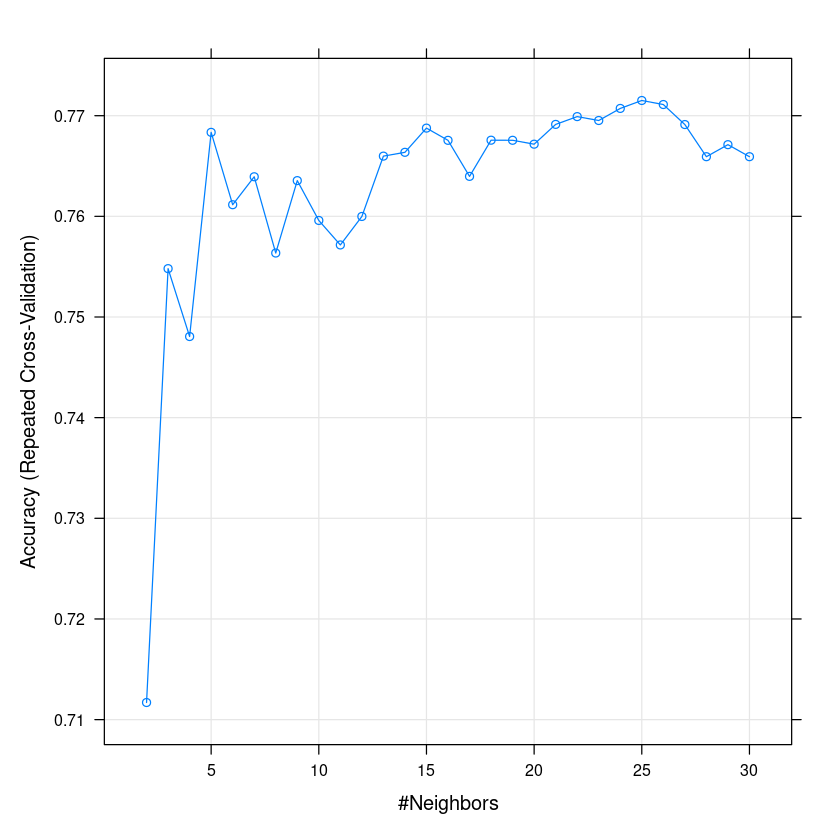

In [43]:
knn_fit
plot(knn_fit)

In [50]:
knn_pred <- predict(knn_fit, newdata = titanicDataTest)

comparator <- sum(rep(0, nrow(titanicDataTest)) != titanicDataTest$survived) / nrow(titanicDataTest)

misclass <- sum(knn_pred != titanicDataTest$survived) / nrow(titanicDataTest)

print(misclass)
print(comparator)

[1] 0.2057416
[1] 0.3875598
